In [ ]:
!pip install rdkit-pypi
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 37.2 MB/s eta 0:00:00


In [ ]:
#task 2
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
#import rdkit.Chem
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

# load excel file from directory
data_drug = pd.read_excel('/content/BBB_datasets.xlsx')

# Select the SMILES column
smiles = data_drug['SMILES']

# Create a list
mol_descriptors = []

# Loop through every drug and calculate the molecular descriptors

for i in data_drug['SMILES']:
    moler = Chem.MolFromSmiles(i)
    if True:
        try:
            calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
            vector = calc.CalcDescriptors(moler)
            mol_descriptors.append(vector)
        except:
            print(i)


# print list of all 200 mol descriptors
Descriptors._descList

# create an array of the 200 mol descriptors
cols_mols = np.asarray(Descriptors._descList)

desc_df = pd.DataFrame(mol_descriptors, columns = cols_mols)

#print them to test they look ok
desc_df

# Now its time to perform EDA, followed by ML training

Streaming output truncated to the last 5000 lines.
    rdkit.Chem.rdMolDescriptors.CalcChi2n(NoneType)
did not match C++ signature:
    CalcChi2n(RDKit::ROMol mol, bool force=False)
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/usr/local/lib/python3.10/dist-packages/rdkit/Chem/GraphDescriptors.py", line 407, in <lambda>
    Chi2v = lambda x: rdMolDescriptors.CalcChi2v(x)
Boost.Python.ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcChi2v(NoneType)
did not match C++ signature:
    CalcChi2v(RDKit::ROMol mol, bool force=False)
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/usr/local/lib/python3.10/dist-packages/rdkit/Chem/GraphDescriptors.py", line 422, in <lambda>
    Chi3n = lambda x

,"(MaxEStateIndex, <function MaxEStateIndex at 0x7ddb97a6d2d0>)","(MinEStateIndex, <function MinEStateIndex at 0x7ddb97a6d360>)","(MaxAbsEStateIndex, <function MaxAbsEStateIndex at 0x7ddb97a6d3f0>)","(MinAbsEStateIndex, <function MinAbsEStateIndex at 0x7ddb97a6d480>)","(qed, <function qed at 0x7ddb97a904c0>)","(MolWt, <function <lambda> at 0x7ddb97a90790>)","(HeavyAtomMolWt, <function HeavyAtomMolWt at 0x7ddb97a90820>)","(ExactMolWt, <function <lambda> at 0x7ddb97a908b0>)","(NumValenceElectrons, <function NumValenceElectrons at 0x7ddb97a90940>)","(NumRadicalElectrons, <function NumRadicalElectrons at 0x7ddb97a909d0>)",...,"(fr_sulfide, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa24d0>)","(fr_sulfonamd, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa27a0>)","(fr_sulfone, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa2710>)","(fr_term_acetylene, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa29e0>)","(fr_tetrazole, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa30a0>)","(fr_thiazole, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa2c20>)","(fr_thiocyan, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa2320>)","(fr_thiophene, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa2b90>)","(fr_unbrch_alkane, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa32e0>)","(fr_urea, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa2950>)"
0,13.332186,-0.207969,13.332186,0.207969,0.513211,389.478,365.286,389.201574,148,0,...,0,0,0,0,0,0,0,0,0,0
1,13.206916,-0.191326,13.206916,0.191326,0.725377,323.415,301.239,323.179776,124,0,...,0,0,0,0,0,0,0,0,0,0
2,13.161295,0.203395,13.161295,0.203395,0.703853,391.559,358.295,391.262363,154,0,...,0,0,0,0,0,0,0,0,0,0
3,5.054012,0.557099,5.054012,0.557099,0.436304,98.960,94.928,97.969005,26,0,...,0,0,0,0,0,0,0,0,0,0
4,3.788333,0.010023,3.788333,0.010023,0.720284,221.303,206.183,221.120449,84,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,12.743300,-0.698671,12.743300,0.016984,0.161558,596.562,569.346,595.088152,202,0,...,0,0,0,0,0,0,0,0,0,0
601,4.288947,0.868296,4.288947,0.868296,0.704773,189.262,174.142,189.126597,74,0,...,0,0,0,0,0,0,0,0,0,0
602,11.451388,-0.417972,11.451388,0.020187,0.687546,211.221,198.117,211.095691,82,0,...,0,0,0,0,0,0,0,0,0,0
603,11.712620,-0.642870,11.712620,0.280483,0.480439,268.253,254.141,268.104030,102,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
desc_df.head()

,"(MaxEStateIndex, <function MaxEStateIndex at 0x7ddb97a6d2d0>)","(MinEStateIndex, <function MinEStateIndex at 0x7ddb97a6d360>)","(MaxAbsEStateIndex, <function MaxAbsEStateIndex at 0x7ddb97a6d3f0>)","(MinAbsEStateIndex, <function MinAbsEStateIndex at 0x7ddb97a6d480>)","(qed, <function qed at 0x7ddb97a904c0>)","(MolWt, <function <lambda> at 0x7ddb97a90790>)","(HeavyAtomMolWt, <function HeavyAtomMolWt at 0x7ddb97a90820>)","(ExactMolWt, <function <lambda> at 0x7ddb97a908b0>)","(NumValenceElectrons, <function NumValenceElectrons at 0x7ddb97a90940>)","(NumRadicalElectrons, <function NumRadicalElectrons at 0x7ddb97a909d0>)",...,"(fr_sulfide, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa24d0>)","(fr_sulfonamd, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa27a0>)","(fr_sulfone, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa2710>)","(fr_term_acetylene, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa29e0>)","(fr_tetrazole, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa30a0>)","(fr_thiazole, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa2c20>)","(fr_thiocyan, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa2320>)","(fr_thiophene, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa2b90>)","(fr_unbrch_alkane, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa32e0>)","(fr_urea, <function _LoadPatterns.<locals>.<lambda> at 0x7ddb97aa2950>)"
0,13.332186,-0.207969,13.332186,0.207969,0.513211,389.478,365.286,389.201574,148,0,...,0,0,0,0,0,0,0,0,0,0
1,13.206916,-0.191326,13.206916,0.191326,0.725377,323.415,301.239,323.179776,124,0,...,0,0,0,0,0,0,0,0,0,0
2,13.161295,0.203395,13.161295,0.203395,0.703853,391.559,358.295,391.262363,154,0,...,0,0,0,0,0,0,0,0,0,0
3,5.054012,0.557099,5.054012,0.557099,0.436304,98.960,94.928,97.969005,26,0,...,0,0,0,0,0,0,0,0,0,0
4,3.788333,0.010023,3.788333,0.010023,0.720284,221.303,206.183,221.120449,84,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#changing column names

NamesNew = {}
for name in desc_df:
  NamesNew [name]= name[0]
  print(NamesNew)
  desc_df = desc_df.rename(columns = NamesNew)

{('MaxEStateIndex', <function MaxEStateIndex at 0x7ddb97a6d2d0>): 'MaxEStateIndex'}
{('MaxEStateIndex', <function MaxEStateIndex at 0x7ddb97a6d2d0>): 'MaxEStateIndex', ('MinEStateIndex', <function MinEStateIndex at 0x7ddb97a6d360>): 'MinEStateIndex'}
{('MaxEStateIndex', <function MaxEStateIndex at 0x7ddb97a6d2d0>): 'MaxEStateIndex', ('MinEStateIndex', <function MinEStateIndex at 0x7ddb97a6d360>): 'MinEStateIndex', ('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0x7ddb97a6d3f0>): 'MaxAbsEStateIndex'}
{('MaxEStateIndex', <function MaxEStateIndex at 0x7ddb97a6d2d0>): 'MaxEStateIndex', ('MinEStateIndex', <function MinEStateIndex at 0x7ddb97a6d360>): 'MinEStateIndex', ('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0x7ddb97a6d3f0>): 'MaxAbsEStateIndex', ('MinAbsEStateIndex', <function MinAbsEStateIndex at 0x7ddb97a6d480>): 'MinAbsEStateIndex'}
{('MaxEStateIndex', <function MaxEStateIndex at 0x7ddb97a6d2d0>): 'MaxEStateIndex', ('MinEStateIndex', <function MinEStateIndex at 0x7ddb97

In [ ]:
desc_df.head(7)

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.332186,-0.207969,13.332186,0.207969,0.513211,389.478,365.286,389.201574,148,0,...,0,0,0,0,0,0,0,0,0,0
1,13.206916,-0.191326,13.206916,0.191326,0.725377,323.415,301.239,323.179776,124,0,...,0,0,0,0,0,0,0,0,0,0
2,13.161295,0.203395,13.161295,0.203395,0.703853,391.559,358.295,391.262363,154,0,...,0,0,0,0,0,0,0,0,0,0
3,5.054012,0.557099,5.054012,0.557099,0.436304,98.960,94.928,97.969005,26,0,...,0,0,0,0,0,0,0,0,0,0
4,3.788333,0.010023,3.788333,0.010023,0.720284,221.303,206.183,221.120449,84,0,...,0,0,0,0,0,0,0,0,0,0
5,9.444444,0.166667,9.444444,0.166667,0.398237,58.080,52.032,58.041865,24,0,...,0,0,0,0,0,0,0,0,0,0
6,2.000000,2.000000,2.000000,2.000000,0.442628,78.114,72.066,78.046950,30,0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-9-bfd13cd7b21f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data_drug, palette='coolwarm')  # Using a different color palette


NameError: name 'label_encoder' is not defined

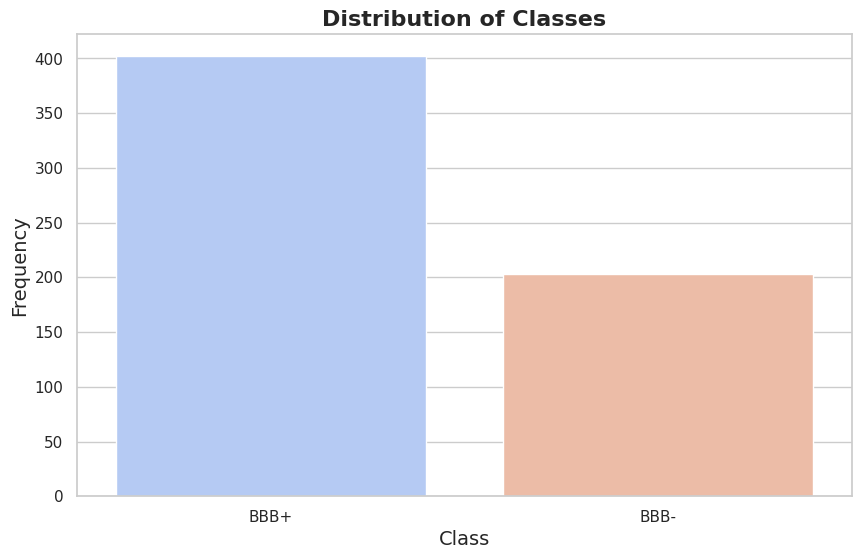

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))  # Slightly larger figure size for better readability
sns.countplot(x='Class', data=data_drug, palette='coolwarm')  # Using a different color palette

# Customize title and labels
plt.title('Distribution of Classes', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Update xticks if necessary
plt.xticks(ticks=[0, 1], labels=label_encoder.classes_, fontsize=12)  # Ensure the labels match your data

# Add a vertical grid to enhance readability
plt.grid(axis='y')

# Show the plot
plt.show()


In [ ]:
#Join the datasets
df_combined = pd.concat([data_drug, desc_df], axis = 1)
df_combined.head(6)

,Drug Name,SMILES,Class,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,c1cc(F)ccc1Cn(c(c23)cccc2)c(n3)N(CC4)CCC4n(c5)...,BBB+,13.332186,-0.207969,13.332186,0.207969,0.513211,389.478,365.286,...,0,0,0,0,0,0,0,0,0,0
1,2,c1cc(F)ccc1Cn(c(c23)cccc2)c(n3)[C@@H]4CCCN(C)C4,BBB+,13.206916,-0.191326,13.206916,0.191326,0.725377,323.415,301.239,...,0,0,0,0,0,0,0,0,0,0
2,5,CC1CCN(CC1)C(=O)c(c2)ccc3n(CC=C)c(c4c23)CCN(C4...,BBB+,13.161295,0.203395,13.161295,0.203395,0.703853,391.559,358.295,...,0,0,0,0,0,0,0,0,0,0
3,11,ClCCCl,BBB+,5.054012,0.557099,5.054012,0.557099,0.436304,98.960,94.928,...,0,0,0,0,0,0,0,0,0,0
4,120,c1cccc(c1C23C)C(N3)Cc4c2cccc4,BBB+,3.788333,0.010023,3.788333,0.010023,0.720284,221.303,206.183,...,0,0,0,0,0,0,0,0,0,0
5,180,CC(=O)C,BBB+,9.444444,0.166667,9.444444,0.166667,0.398237,58.080,52.032,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
desc_df.isna().sum().sum()

24

In [ ]:
desc_df=desc_df.dropna()

In [ ]:
#Find any replicas for the data
combined_replicaDF = df_combined[df_combined.duplicated()]
combined_replicaDF

,Drug Name,SMILES,Class,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea


In [ ]:
df_combined.isna().sum().sum()

24

In [ ]:
df_combined = df_combined.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assigning features and target variable
X = df_combined.iloc[:, 3:211]
y = df_combined['Class']

# Convert all feature names to strings
X.columns = [str(col_name) for col_name in X.columns]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
forest_classifier = RandomForestClassifier(random_state=42)

# Initialize the RFE with the Random Forest Classifier and select the top 10 features
feature_selector = RFE(estimator=forest_classifier, n_features_to_select=10)

# Fit RFE to the training data instead of the entire dataset
feature_selector.fit(X_train, y_train)

# Identify the features that were selected by RFE
top_features = X.columns[feature_selector.support_]

# Obtain the feature importances from the fitted model
importance_scores = feature_selector.estimator_.feature_importances_

# Combine the selected features with their importances and sort them
features_ranked = sorted(zip(top_features, importance_scores), key=lambda pair: pair[1], reverse=True)

# Displaying the sorted feature importance rankings
features_ranked


[('TPSA', 0.19953688718567802),
 ('VSA_EState2', 0.10697215564259076),
 ('VSA_EState3', 0.10069635492197411),
 ('MinAbsPartialCharge', 0.09880082417892763),
 ('NOCount', 0.09286754148721091),
 ('MaxPartialCharge', 0.08270032916735492),
 ('MinPartialCharge', 0.0811936961300289),
 ('HallKierAlpha', 0.08008831643116733),
 ('MinEStateIndex', 0.07916937371654581),
 ('MolLogP', 0.07797452113852171)]

,Feature,Importance
0,TPSA,0.199537
1,VSA_EState2,0.106972
2,VSA_EState3,0.100696
3,MinAbsPartialCharge,0.098801
4,NOCount,0.092868
5,MaxPartialCharge,0.082700
6,MinPartialCharge,0.081194
7,HallKierAlpha,0.080088
8,MinEStateIndex,0.079169
9,MolLogP,0.077975


In [ ]:
#
features_ranked = [
    ('TPSA', 0.19953688718567802),
    ('VSA_EState2', 0.10697215564259076),
    ('VSA_EState3', 0.10069635492197411),
    ('MinAbsPartialCharge', 0.09880082417892763),
    ('NOCount', 0.09286754148721091),
    ('MaxPartialCharge', 0.08270032916735492),
    ('MinPartialCharge', 0.0811936961300289),
    ('HallKierAlpha', 0.08008831643116733),
    ('MinEStateIndex', 0.07916937371654581),
    ('MolLogP', 0.07797452113852171)
]

# Extract the feature names
selected_feature_names = [feature for feature, importance in features_ranked]

# Create a DataFrame with only the selected features and the class column
SelectedDF = df_combined[selected_feature_names + ['Class']]

SelectedDF



,TPSA,VSA_EState2,VSA_EState3,MinAbsPartialCharge,NOCount,MaxPartialCharge,MinPartialCharge,HallKierAlpha,MinEStateIndex,MolLogP,Class
0,38.88,7.315754,4.499158,0.206367,5,0.206367,-0.342058,-3.15,-0.207969,4.57012,BBB+
1,21.06,7.331396,0.000000,0.122729,3,0.122729,-0.323209,-2.20,-0.191326,4.03290,BBB+
2,28.48,17.833871,1.276458,0.253374,4,0.253374,-0.340406,-2.07,0.203395,4.46750,BBB+
3,0.00,0.000000,0.000000,0.035889,0,0.035889,-0.125423,0.58,0.557099,1.46400,BBB+
4,12.03,0.000000,3.788333,0.067223,1,0.067223,-0.296645,-1.60,0.010023,3.15050,BBB+
...,...,...,...,...,...,...,...,...,...,...,...
600,131.27,50.818804,1.075195,0.354402,9,0.354402,-0.460649,-2.73,-0.698671,5.74232,BBB-
601,36.42,4.288947,6.461023,0.195429,3,0.195429,-0.354255,-1.51,0.868296,1.67454,BBB-
602,90.37,15.063089,8.896112,0.351119,6,0.351119,-0.393676,-1.40,-0.417972,-0.50460,BBB-
603,134.63,28.117527,12.803310,0.329960,9,0.329960,-0.393584,-2.09,-0.642870,-0.95621,BBB-


<ipython-input-19-d401a6cb54e7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=SelectedDF, x='Class', y=feature, palette='coolwarm')
<ipython-input-19-d401a6cb54e7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=SelectedDF, x='Class', y=feature, palette='coolwarm')
<ipython-input-19-d401a6cb54e7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=SelectedDF, x='Class', y=feature, palette='coolwarm')
<ipython-input-19-d401a6cb54e7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

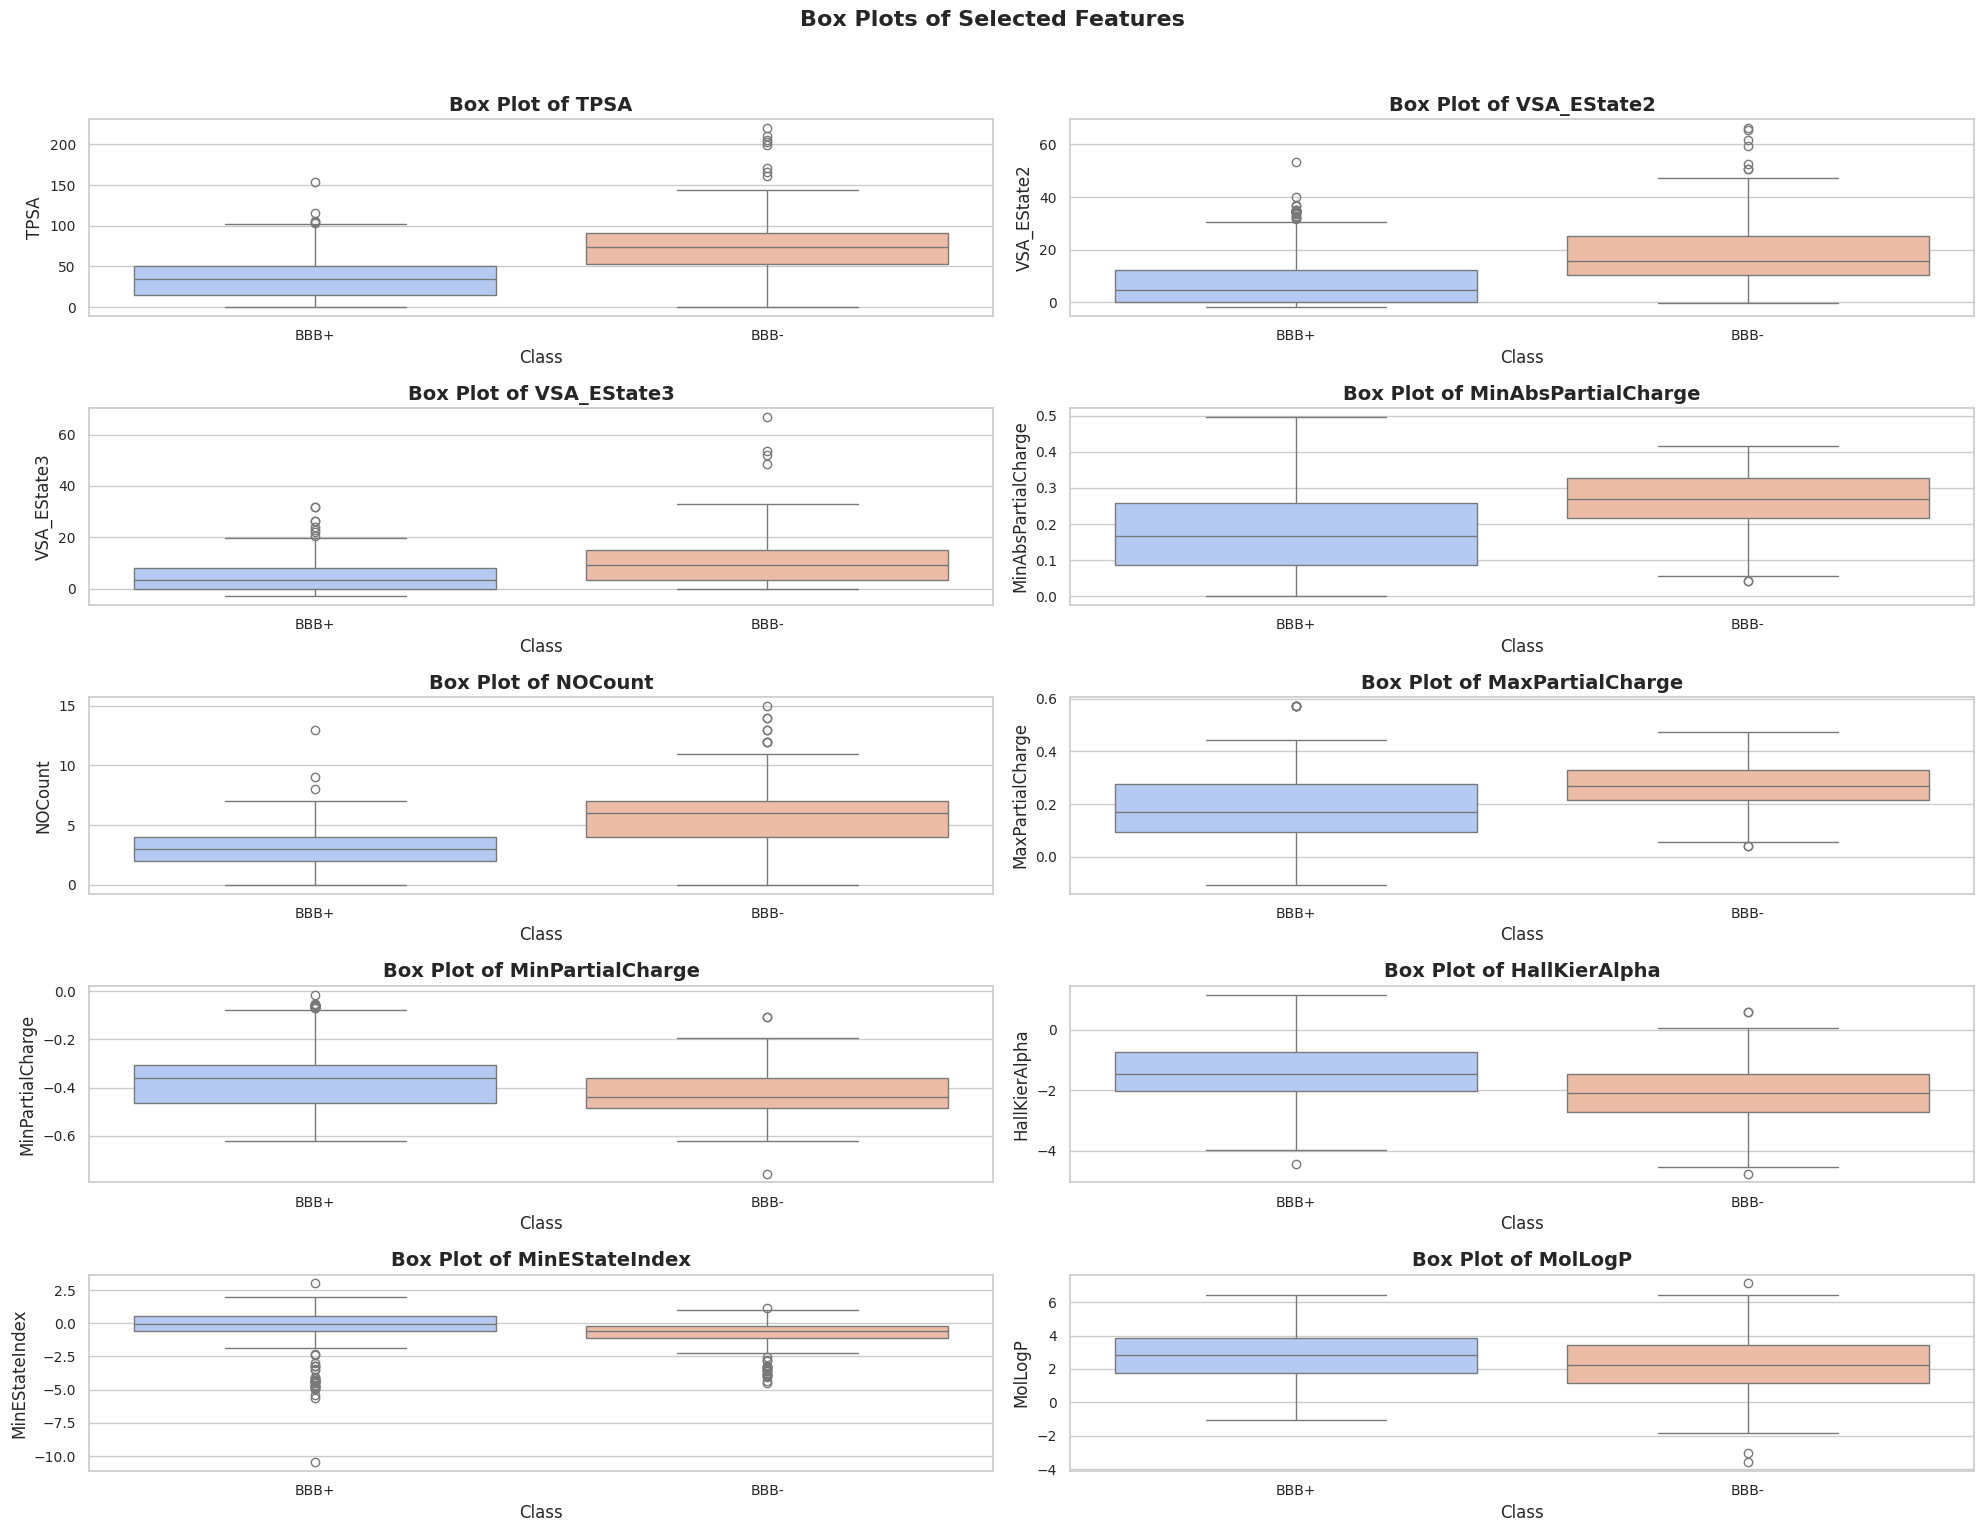

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Determine the number of rows needed for subplots based on the number of features
num_rows = len(selected_feature_names) // 2 + len(selected_feature_names) % 2

# Iterate over each of the selected features to create a box plot for each
for i, feature in enumerate(selected_feature_names, 1):
    plt.subplot(num_rows, 2, i)  # Create a subplot for each feature
    sns.boxplot(data=SelectedDF, x='Class', y=feature, palette='coolwarm')

    # Customize further details of the plot for aesthetics
    plt.title(f'Box Plot of {feature}', fontsize=14, fontweight='bold')
    plt.xlabel('Class', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

# Add overall title and adjust layout
plt.suptitle('Box Plots of Selected Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Show the final result
plt.show()



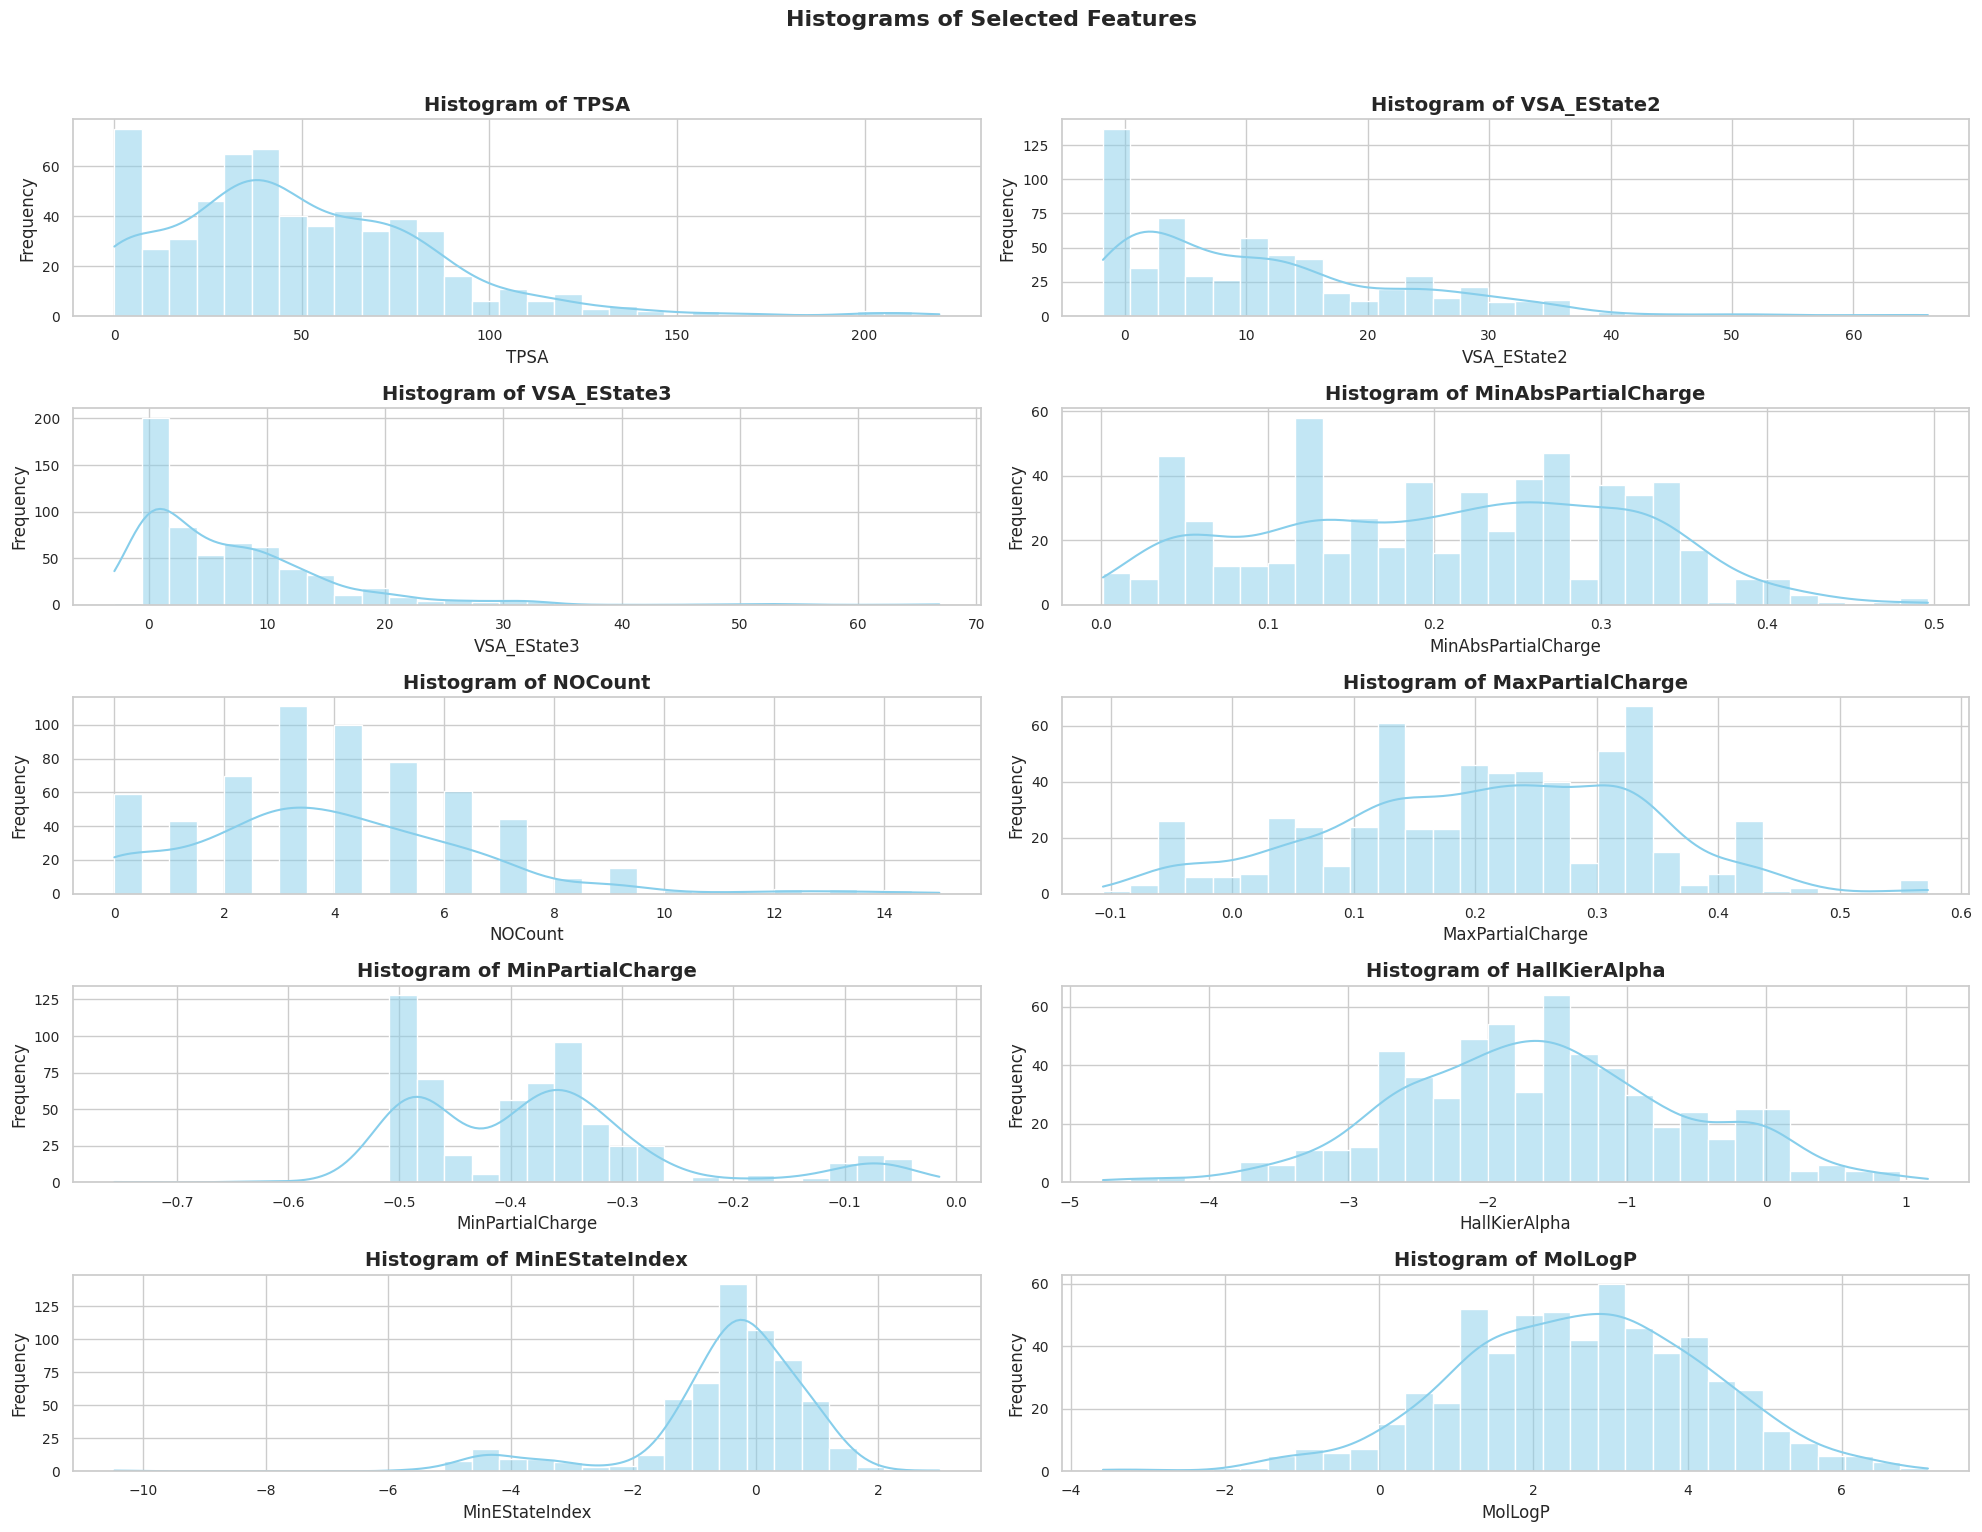

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid", palette='pastel')

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Determine the number of rows needed for subplots based on the number of features
num_rows = len(selected_feature_names) // 2 + len(selected_feature_names) % 2

# Iterate over each of the selected features to create a histogram for each
for i, feature in enumerate(selected_feature_names, 1):
    plt.subplot(num_rows, 2, i)  # Create a subplot for each feature
    sns.histplot(SelectedDF[feature], bins=30, kde=True, color='skyblue')

    # Customize further details of the plot for aesthetics
    plt.title(f'Histogram of {feature}', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

# Add overall title and adjust layout
plt.suptitle('Histograms of Selected Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Show the final result
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separating the features and the target variable
X = SelectedDF.drop('Class', axis=1)
y = SelectedDF['Class']

# It's important to split your data into training and testing sets before applying SMOTE
# to avoid leaking information from the test set into the training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SMOTE object
sm = SMOTE(random_state=42)

# Fit the SMOTE object to the training data only
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Now you have X_train_resampled and y_train_resampled which you can use for further modeling


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize a Logistic Regression model
logreg_classifier = LogisticRegression(random_state=42)

logreg_classifier

LogisticRegression(random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that scales the data then fits the logistic regression model
logreg_classifier = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

# Fit the model
logreg_classifier.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
# Assuming you have already created X_train_resampled and y_train_resampled using SMOTE

# Train the Random Forest Classifier
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Train the Logistic Regression model
logreg_classifier.fit(X_train_resampled, y_train_resampled)

logreg_classifier.fit

<bound method Pipeline.fit of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Calculating the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # or 'binary' if you have binary classification
recall = recall_score(y_test, y_pred, average='weighted')  # or 'binary'
f1 = f1_score(y_test, y_pred, average='weighted')  # or 'binary'

# Generating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Detailed classification report
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.7686
Precision: 0.7944
Recall: 0.7686
F1 Score: 0.7740

Confusion Matrix:
 [[60 20]
 [ 8 33]]

Classification Report:
               precision    recall  f1-score   support

        BBB+       0.88      0.75      0.81        80
        BBB-       0.62      0.80      0.70        41

    accuracy                           0.77       121
   macro avg       0.75      0.78      0.76       121
weighted avg       0.79      0.77      0.77       121



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming SelectedDF is the DataFrame after feature selection using RFE
X = SelectedDF.drop('Class', axis=1)
y = SelectedDF['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
logreg_classifier = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Train the Logistic Regression model
logreg_classifier.fit(X_train, y_train)

# Predictions and evaluations for Random Forest
y_pred_rf = rf_classifier.predict(X_test)
print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Predictions and evaluations for Logistic Regression
y_pred_logreg = logreg_classifier.predict(X_test)
print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Random Forest Classifier Evaluation:
Accuracy: 0.8429752066115702
              precision    recall  f1-score   support

        BBB+       0.87      0.90      0.88        80
        BBB-       0.79      0.73      0.76        41

    accuracy                           0.84       121
   macro avg       0.83      0.82      0.82       121
weighted avg       0.84      0.84      0.84       121


Logistic Regression Model Evaluation:
Accuracy: 0.8099173553719008
              precision    recall  f1-score   support

        BBB+       0.84      0.89      0.86        80
        BBB-       0.75      0.66      0.70        41

    accuracy                           0.81       121
   macro avg       0.79      0.77      0.78       121
weighted avg       0.81      0.81      0.81       121



SVM Confusion Matrix:
[[71  9]
 [12 29]]


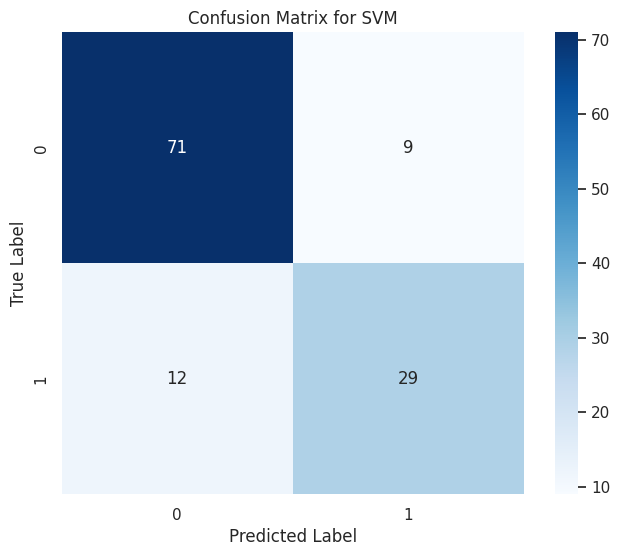

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming X_train, X_test, y_train, y_test are already defined from the previous steps

# Create a pipeline that scales the data then fits the SVM model
svm_classifier = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', random_state=42)  # You can choose the kernel depending on your data
)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculating the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print the confusion matrix
print("SVM Confusion Matrix:")
print(conf_matrix_svm)

# If you want to print a more visual confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()


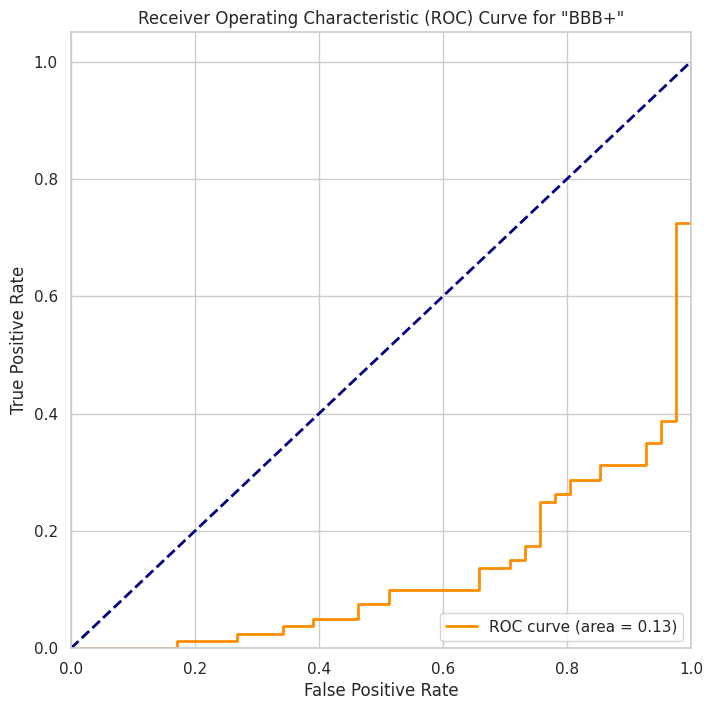

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the prediction scores. If your model outputs probabilities, use predict_proba() instead of decision_function()
y_scores = logreg_classifier.predict_proba(X_test)[:, 1]  # index 1 for the positive class 'BBB+'

# Calculate the false positive rate, true positive rate, and threshold along with the AUC (Area Under Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label='BBB+')
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for "BBB+"')
plt.legend(loc="lower right")
plt.show()




<ipython-input-29-574c53ab559e>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = SelectedDF.corr()


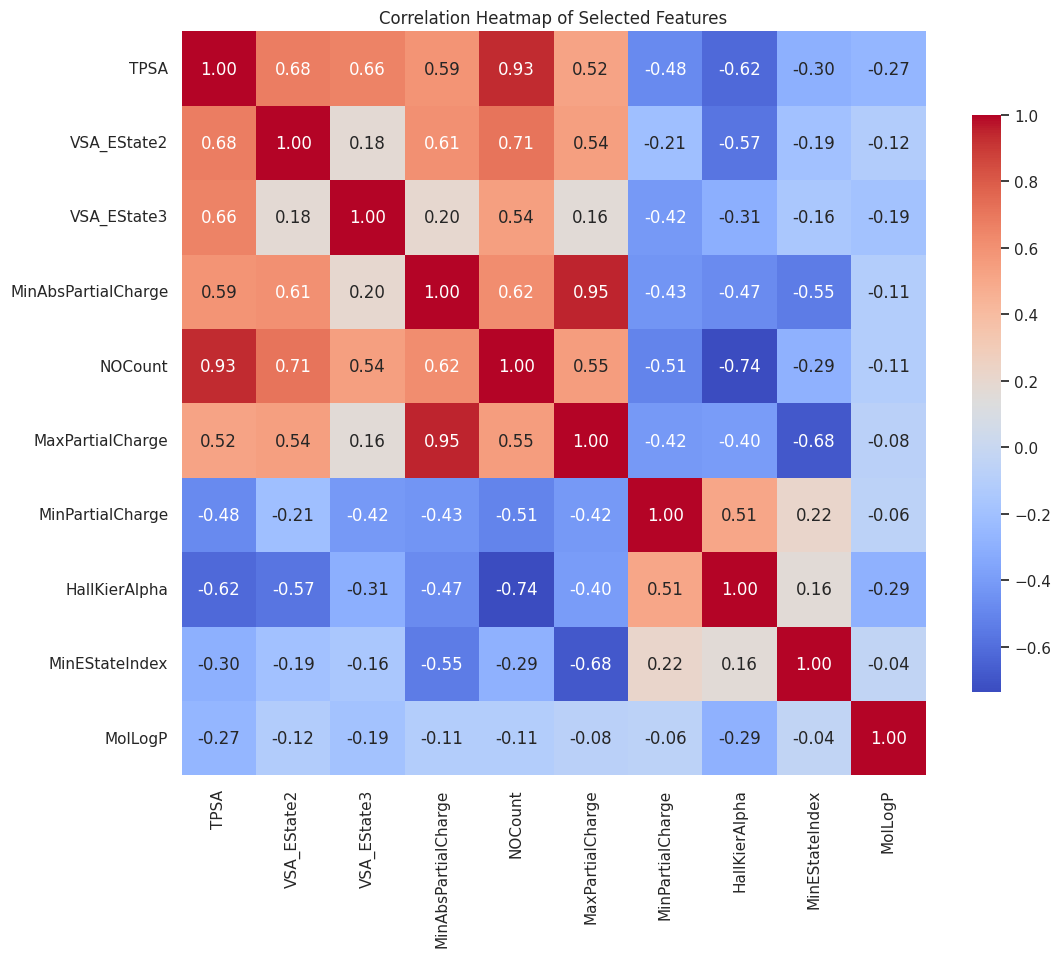

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming SelectedDF is your DataFrame with the selected features and the class label

# Calculate the correlation matrix
correlation_matrix = SelectedDF.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .75})

# Add a title to the heatmap
plt.title('Correlation Heatmap of Selected Features')

# Show the plot
plt.show()
